#LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape

# Assuming the number of features in your processed data is 29
num_features = X_processed.shape[1]  # For example, 29 features
input_shape = (num_features,)  # Original input shape for dense model

LSTM_model = Sequential([
    # Reshape layer added to reshape input to (1, num_features) for LSTM
    Reshape((1, num_features), input_shape=input_shape),
    LSTM(32, activation='relu'),
    Dense(3, activation='softmax')  # Assuming a classification task with 3 classes
])

# Compile the model
LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary to check architecture
LSTM_model.summary()


Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1, 29)             0         
                                                                 
 lstm (LSTM)                 (None, 32)                7936      
                                                                 
 dense_112 (Dense)           (None, 3)                 99        
                                                                 
Total params: 8035 (31.39 KB)
Trainable params: 8035 (31.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = LSTM_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1725/1725 [==============================] - 8s 4ms/step - loss: 0.6385 - accuracy: 0.7290 - val_loss: 0.5587 - val_accuracy: 0.7478
Epoch 2/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.5463 - accuracy: 0.7545 - val_loss: 0.5343 - val_accuracy: 0.7543
Epoch 3/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.5320 - accuracy: 0.7574 - val_loss: 0.5283 - val_accuracy: 0.7540
Epoch 4/10
1725/1725 [==============================] - 6s 3ms/step - loss: 0.5261 - accuracy: 0.7589 - val_loss: 0.5217 - val_accuracy: 0.7569
Epoch 5/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.5226 - accuracy: 0.7599 - val_loss: 0.5183 - val_accuracy: 0.7611
Epoch 6/10
1725/1725 [==============================] - 6s 4ms/step - loss: 0.5206 - accuracy: 0.7605 - val_loss: 0.5174 - val_accuracy: 0.7533
Epoch 7/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.5190 - accuracy: 0.7600 - val_loss: 0.5147 - val_accuracy:

In [ ]:
LSTM_model.save('LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('LSTM_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
LSTM_model.evaluate(X_val, y_val)

192/192 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7618


[0.5117838978767395, 0.7617805600166321]

192/192 [==============================] - 1s 2ms/step


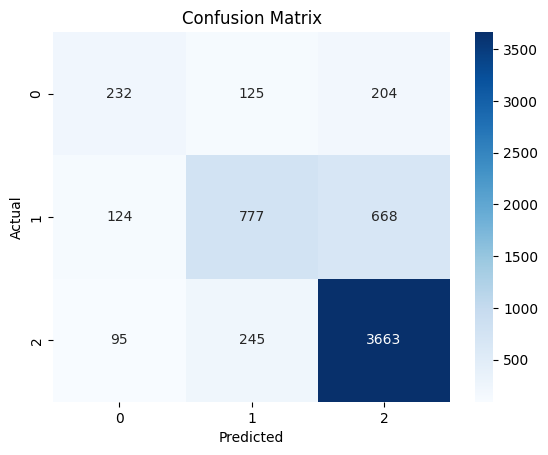

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#hard = 0 , med = 1 , soft = 2
# Make predictions on the validation set
y_val_pred_prob = LSTM_model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix using seaborn
labels = np.unique(y_val)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()